# **Instituto Tecnológico Vale**

## **Introdução a Visão Computacional**

### **Aula 06 - Reconhecimento de imagem**

## **Exemplo prático**

Classificação de logos usando o algoritmo de extração hog e o algoritmo kmeans para classificação.

Documentação do sklearn para algoritmo KNeighborsClassifier:

[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[]()

In [ ]:
# Imports

import argparse
import imutils
import cv2
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths
import numpy as np

from google.colab.patches import cv2_imshow

In [ ]:
# Baixar os arquivos necessários para a aula
!rm -rf intro_cv_proficam
!git clone https://github.com/h3ct0r/intro_cv_proficam
!cp -r intro_cv_proficam/img img

Cloning into 'intro_cv_proficam'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 149 (delta 17), reused 142 (delta 12), pack-reused 0
Receiving objects: 100% (149/149), 19.01 MiB | 13.20 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
# Inicializa a matriz de dados e de labels
data = []
labels = []

In [ ]:
# Loop pelas imagens no dataset de treino

for imagePath in paths.list_images("img/pratica_logos/logos"):
	make = imagePath.split("/")[-2]
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	edged = imutils.auto_canny(gray)

	# Encontra contornos no mapa de borda, mantendo apenas o maior que se supõe ser o logotipo do carro
	(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	c = max(cnts, key=cv2.contourArea)

	# Extrai o logotipo do carro e redimensiona 
	(x, y, w, h) = cv2.boundingRect(c)
	logo = gray[y:y + h, x:x + w]
	logo = cv2.resize(logo, (200, 100))

	# Extrai Histograma de Gradientes Orientados do logotipo
	# Os parâmetros mais importantes para o descritor HOG são: orientations, pixels_per_cell e cells_per_block. 
	# Esses três parâmetros (juntamente com o tamanho da imagem de entrada) controlam efetivamente a dimensionalidade 
	# do vetor de características resultante.
	H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True)

	# Atualiza dados e labels
	data.append(H)
	labels.append(make)

In [ ]:
# Features extraidas

np.shape(data)

(25, 6156)

In [ ]:
# Label
labels

['honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'ford',
 'ford',
 'ford',
 'ford',
 'ford',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru']

In [ ]:
# Cria o modelo
model = KNeighborsClassifier(n_neighbors=1)

# Fit do modelo
model.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Avaliando...


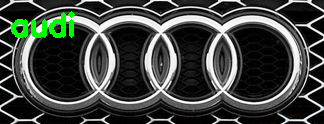

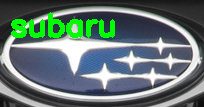

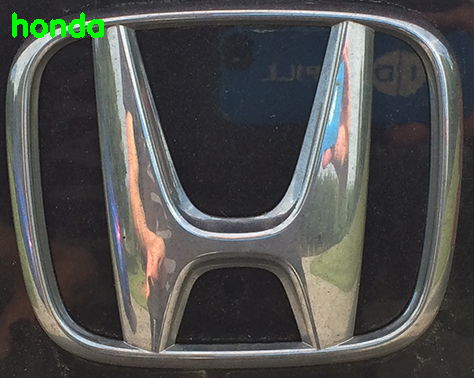

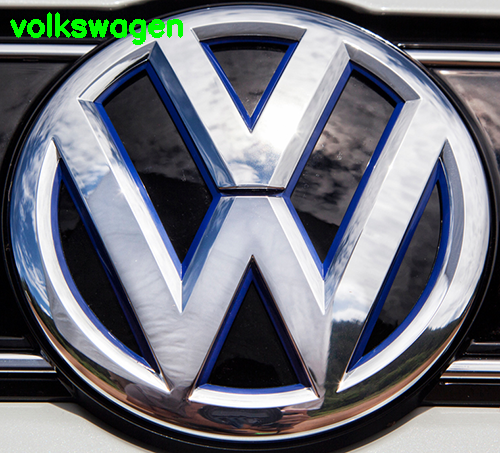

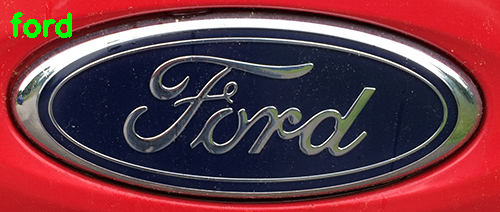

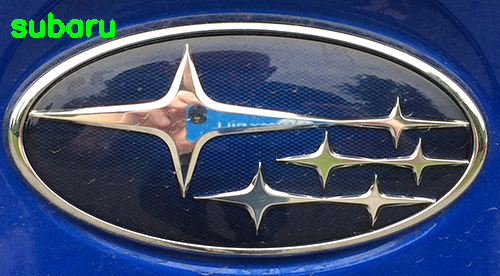

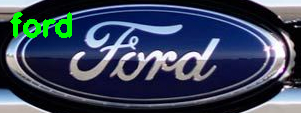

In [ ]:
# Loop no dataset de teste
print ("Avaliando...")
for (i, imagePath) in enumerate(paths.list_images("img/pratica_logos/test_images")):
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	logo = cv2.resize(gray, (200, 100))

	# Extrai o Histograma de Gradientes Orientados da imagem de teste e prevê a marca do carro
	H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True)
	pred = model.predict(H.reshape(1, -1))[0]

	# Print das previsões
	cv2.putText(image, pred, (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
	cv2_imshow(image)
	cv2.waitKey(0)